Читска датасета 

In [3]:
import pandas as pd

# Загрузка CSV-файла
file_path = 'plant_health_data.csv'
df = pd.read_csv(file_path)

# Удаление первых двух столбцов
df = df.iloc[:, 2:]

# Переименование оставшихся столбцов на русский
df.columns = [
    'Влажность_почвы',
    'Температура_окруж_среды',
    'Температура_почвы',
    'Влажность_воздуха',
    'Интенсивность_света',
    'pH_почвы',
    'Уровень_азота',
    'Уровень_фосфора',
    'Уровень_калия',
    'Содержание_хлорофилла',
    'Электрохимический_сигнал',
    'Состояние_здоровья_растения'
]

# Вывод первых строк для проверки
print(df.head())

# (необязательно) Сохранение в новый CSV-файл
df.to_csv('plant_health_data_rus.csv', index=False)


   Влажность_почвы  Температура_окруж_среды  Температура_почвы  \
0        27.521109                22.240245          21.900435   
1        14.835566                21.706763          18.680892   
2        17.086362                21.180946          15.392939   
3        15.336156                22.593302          22.778394   
4        39.822216                28.929001          18.100937   

   Влажность_воздуха  Интенсивность_света  pH_почвы  Уровень_азота  \
0          55.291904           556.172805  5.581955      10.003650   
1          63.949181           596.136721  7.135705      30.712562   
2          67.837956           591.124627  5.656852      29.337002   
3          58.190811           241.412476  5.584523      16.966621   
4          63.772036           444.493830  5.919707      10.944961   

   Уровень_фосфора  Уровень_калия  Содержание_хлорофилла  \
0        45.806852      39.076199              35.703006   
1        25.394393      17.944826              27.993296   
2 

лучшая модель 

Распределение классов (количество образцов на класс):
Сост_здоровья_растения
High Stress        500
Moderate Stress    401
Healthy            299
Name: count, dtype: int64 


=== Logistic Regression ===


GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=42, shuffle=True),
             estimator=Pipeline(steps=[('preprocessor',
                                        ColumnTransformer(transformers=[('num',
                                                                         Pipeline(steps=[('imputer',
                                                                                          SimpleImputer()),
                                                                                         ('scaler',
                                                                                          StandardScaler())]),
                                                                         Index(['Влажность_почвы', 'Температура_окруж_среды', 'Температура_почвы',
       'Влажность_воздуха', 'Интенсивность_света', 'pH_почвы', 'Уровень_азота',
       'Уровень_фосфора', 'Уровень_калия', 'Содержание_хлорофилла',
       'Электрохим_сигнал'],
      dtype='object'))])),
                                       ('model',
                                        LogisticRegression(max_iter=1000))]),
             n_jobs=-1, param_grid={'model__C': [0.1, 1, 10]},
             scoring='balanced_accuracy')

Лучшие параметры: {'model__C': 10}
                 precision    recall  f1-score   support

        Healthy       0.79      0.80      0.79       299
    High Stress       0.82      0.83      0.82       500
Moderate Stress       0.66      0.65      0.66       401

       accuracy                           0.76      1200
      macro avg       0.76      0.76      0.76      1200
   weighted avg       0.76      0.76      0.76      1200

Balanced Accuracy: 0.757

=== KNN ===


GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=42, shuffle=True),
             estimator=Pipeline(steps=[('preprocessor',
                                        ColumnTransformer(transformers=[('num',
                                                                         Pipeline(steps=[('imputer',
                                                                                          SimpleImputer()),
                                                                                         ('scaler',
                                                                                          StandardScaler())]),
                                                                         Index(['Влажность_почвы', 'Температура_окруж_среды', 'Температура_почвы',
       'Влажность_воздуха', 'Интенсивность_света', 'pH_почвы', 'Уровень_азота',
       'Уровень_фосфора', 'Уровень_калия', 'Содержание_хлорофилла',
       'Электрохим_сигнал'],
      dtype='object'))])),
                                       ('model', KNeighborsClassifier())]),
             n_jobs=-1, param_grid={'model__n_neighbors': [3, 5, 7]},
             scoring='balanced_accuracy')

Лучшие параметры: {'model__n_neighbors': 7}
                 precision    recall  f1-score   support

        Healthy       0.68      0.72      0.70       299
    High Stress       0.79      0.80      0.80       500
Moderate Stress       0.57      0.53      0.55       401

       accuracy                           0.69      1200
      macro avg       0.68      0.69      0.68      1200
   weighted avg       0.69      0.69      0.69      1200

Balanced Accuracy: 0.685

=== Decision Tree ===


GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=42, shuffle=True),
             estimator=Pipeline(steps=[('preprocessor',
                                        ColumnTransformer(transformers=[('num',
                                                                         Pipeline(steps=[('imputer',
                                                                                          SimpleImputer()),
                                                                                         ('scaler',
                                                                                          StandardScaler())]),
                                                                         Index(['Влажность_почвы', 'Температура_окруж_среды', 'Температура_почвы',
       'Влажность_воздуха', 'Интенсивность_света', 'pH_почвы', 'Уровень_азота',
       'Уровень_фосфора', 'Уровень_калия', 'Содержание_хлорофилла',
       'Электрохим_сигнал'],
      dtype='object'))])),
                                       ('model', DecisionTreeClassifier())]),
             n_jobs=-1, param_grid={'model__max_depth': [3, 5, None]},
             scoring='balanced_accuracy')

Лучшие параметры: {'model__max_depth': 5}
                 precision    recall  f1-score   support

        Healthy       1.00      1.00      1.00       299
    High Stress       1.00      1.00      1.00       500
Moderate Stress       1.00      1.00      1.00       401

       accuracy                           1.00      1200
      macro avg       1.00      1.00      1.00      1200
   weighted avg       1.00      1.00      1.00      1200

Balanced Accuracy: 0.997

=== Random Forest ===


GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=42, shuffle=True),
             estimator=Pipeline(steps=[('preprocessor',
                                        ColumnTransformer(transformers=[('num',
                                                                         Pipeline(steps=[('imputer',
                                                                                          SimpleImputer()),
                                                                                         ('scaler',
                                                                                          StandardScaler())]),
                                                                         Index(['Влажность_почвы', 'Температура_окруж_среды', 'Температура_почвы',
       'Влажность_воздуха', 'Интенсивность_света', 'pH_почвы', 'Уровень_азота',
       'Уровень_фосфора', 'Уровень_калия', 'Содержание_хлорофилла',
       'Электрохим_сигнал'],
      dtype='object'))])),
                                       ('model', RandomForestClassifier())]),
             n_jobs=-1,
             param_grid={'model__max_depth': [5, None],
                         'model__n_estimators': [50, 100]},
             scoring='balanced_accuracy')

Лучшие параметры: {'model__max_depth': None, 'model__n_estimators': 50}
                 precision    recall  f1-score   support

        Healthy       1.00      1.00      1.00       299
    High Stress       1.00      1.00      1.00       500
Moderate Stress       1.00      1.00      1.00       401

       accuracy                           1.00      1200
      macro avg       1.00      1.00      1.00      1200
   weighted avg       1.00      1.00      1.00      1200

Balanced Accuracy: 0.998


<Figure size 1000x600 with 0 Axes>

<BarContainer object of 4 artists>

Text(0.5, 0, 'Balanced Accuracy')

Text(0.5, 1.0, 'Сравнение моделей по сбалансированной точности (кросс-валидация)')

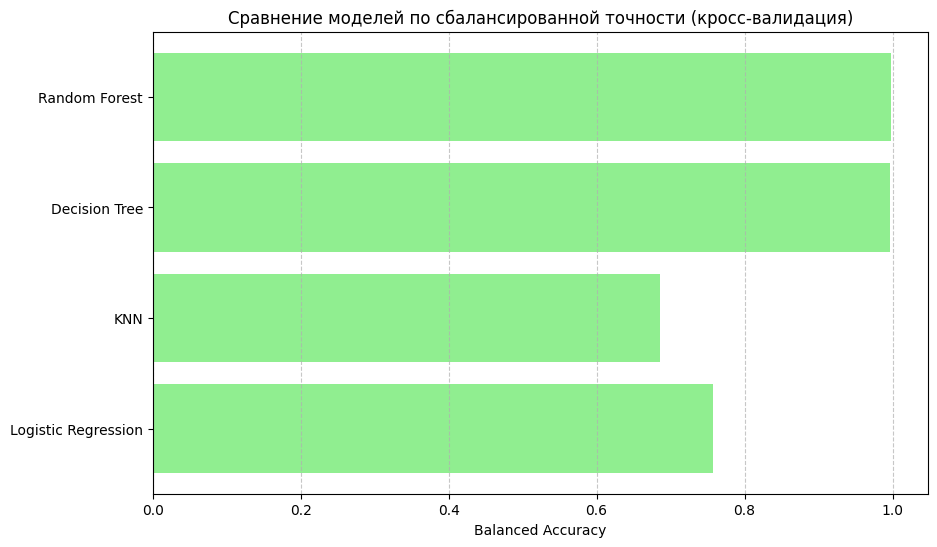

In [11]:
import pandas as pd
import numpy as np
from sklearn.model_selection import GridSearchCV, StratifiedKFold, cross_val_predict
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.impute import SimpleImputer
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, balanced_accuracy_score
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings("ignore")
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

# 1. Загрузка и подготовка данных
df = pd.read_csv('plant_health_data_rus.csv')

df.columns = [
    'Влажность_почвы', 'Температура_окруж_среды', 'Температура_почвы',
    'Влажность_воздуха', 'Интенсивность_света', 'pH_почвы',
    'Уровень_азота', 'Уровень_фосфора', 'Уровень_калия',
    'Содержание_хлорофилла', 'Электрохим_сигнал', 'Сост_здоровья_растения'
]

# 2. Разделение на признаки и целевую переменную
X = df.drop('Сост_здоровья_растения', axis=1)
y = df['Сост_здоровья_растения']

# >>> Вывод информации о классах
print("Распределение классов (количество образцов на класс):")
print(y.value_counts(), "\n")

# >>> Кодирование целевой переменной
le = LabelEncoder()
y_encoded = le.fit_transform(y)

# 3. Преобразование числовых признаков
numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='mean')),
    ('scaler', StandardScaler())
])

preprocessor = ColumnTransformer(
    transformers=[('num', numeric_transformer, X.columns)]
)

# 4. Модели и параметры
models = {
    'Logistic Regression': (
        Pipeline([
            ('preprocessor', preprocessor),
            ('model', LogisticRegression(max_iter=1000))
        ]),
        {'model__C': [0.1, 1, 10]}
    ),
    'KNN': (
        Pipeline([
            ('preprocessor', preprocessor),
            ('model', KNeighborsClassifier())
        ]),
        {'model__n_neighbors': [3, 5, 7]}
    ),
    'Decision Tree': (
        Pipeline([
            ('preprocessor', preprocessor),
            ('model', DecisionTreeClassifier())
        ]),
        {'model__max_depth': [3, 5, None]}
    ),
    'Random Forest': (
        Pipeline([
            ('preprocessor', preprocessor),
            ('model', RandomForestClassifier())
        ]),
        {
            'model__n_estimators': [50, 100],
            'model__max_depth': [5, None]
        }
    )
}

# 5. Обучение, подбор гиперпараметров и отчёты
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
results = {}

for name, (pipeline, param_grid) in models.items():
    print(f"\n=== {name} ===")
    gs = GridSearchCV(pipeline, param_grid, cv=cv, n_jobs=-1, scoring='balanced_accuracy')
    gs.fit(X, y_encoded)
    print("Лучшие параметры:", gs.best_params_)
    best_model = gs.best_estimator_
    
    # Предсказания в кросс-валидации
    y_pred = cross_val_predict(best_model, X, y_encoded, cv=cv)
    print(classification_report(y_encoded, y_pred, target_names=le.classes_))
    
    # Используем balanced accuracy вместо простой accuracy
    bal_acc = balanced_accuracy_score(y_encoded, y_pred)
    print(f"Balanced Accuracy: {bal_acc:.3f}")
    results[name] = bal_acc

# 6. График сравнения balanced accuracy
model_names = list(results.keys())
accuracy_scores = list(results.values())

plt.figure(figsize=(10, 6))
plt.barh(model_names, accuracy_scores, color='lightgreen')
plt.xlabel('Balanced Accuracy')
plt.title('Сравнение моделей по сбалансированной точности (кросс-валидация)')
plt.grid(True, axis='x', linestyle='--', alpha=0.7)
plt.show()

In [12]:
for col in df.columns[:-1]:
    print(f"{col}: min = {df[col].min()}, max = {df[col].max()}")

Влажность_почвы: min = 10.0007235973127, max = 39.99316429183982
Температура_окруж_среды: min = 18.00199266625065, max = 29.990886104906263
Температура_почвы: min = 15.003710067919014, max = 24.99592884647079
Влажность_воздуха: min = 40.02875752265229, max = 69.9688707148899
Интенсивность_света: min = 200.6154818118758, max = 999.8562615329448
pH_почвы: min = 5.507391612755972, max = 7.4978225040780995
Уровень_азота: min = 10.003649716693408, max = 49.95113598031247
Уровень_фосфора: min = 10.017690197570207, max = 49.98069999812708
Уровень_калия: min = 10.000605648792469, max = 49.98194527518656
Содержание_хлорофилла: min = 20.025510963516886, max = 49.990811391895576
Электрохим_сигнал: min = 0.0023759659096933, max = 1.9961158796393743
